In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import sys
sys.path.append('../')

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

from src.globals import raw_data_dir

In [5]:
pd.set_option('display.max_columns', 50)
pd.set_option('display.max_rows', 500)

In [6]:
# check GPU visibility
tf.config.get_visible_devices(
    device_type='GPU'
)

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [7]:
df = pd.read_csv(raw_data_dir/'predictive_maintenance_dataset.csv')

In [8]:
df.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0


In [30]:
df.Type.unique()

array(['M', 'L', 'H'], dtype=object)

In [9]:
df['Product ID'].value_counts()

L52510    1
L54837    1
L51935    1
M15600    1
L51406    1
         ..
L53394    1
M23754    1
L48282    1
L50474    1
L50716    1
Name: Product ID, Length: 10000, dtype: int64

In [11]:
metrics = ['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]',
           'Torque [Nm]', 'Tool wear [min]', 'Machine failure']

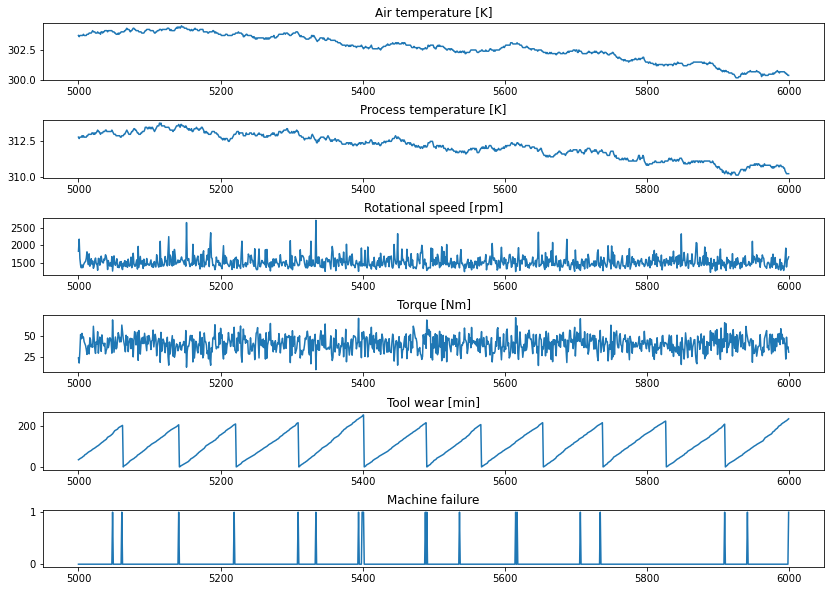

In [33]:
def plot_metrics(df, metrics=df.columns, selected_slice=slice(0,200), figsize=(14,10)):

    fig, ax = plt.subplots(len(metrics), figsize=(14,10))

    for idx, metric in enumerate(metrics):
        df.iloc[5000:6000,:][metric].plot(ax=ax[idx])
        ax[idx].set_title(metric)

    plt.subplots_adjust(hspace=.7)